## 필요 모듈 import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt

import matplotlib as mpl # 그래프옵션설정
# 한글(윈도우)
mpl.rc('font', family='Malgun Gothic')
# 그래프에서 음수값 나올 때, 깨지는 현상 방지 
mpl.rc('axes', unicode_minus=False) 

In [2]:
import pandas as pd
import numpy as np
import os
import random
import pickle
import gc
from IPython.display import Image
import warnings; warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
import pandas_profiling
import matplotlib as mpl
from IPython.display import set_matplotlib_formats
from statsmodels.api import qqplot, add_constant  # 잔차항 분석, 상수항
from statsmodels.formula.api import ols   # 회귀분석 모델 생성
from statsmodels.api import qqplot, add_constant  # 잔차항 분석, 상수항
import statsmodels.formula.api as smf   # 선형 모델 생성
from statsmodels.tools.eval_measures import rmse  # 평가함수
from sklearn.metrics import r2_score  # 결정계수 평가지표
from statsmodels.stats.outliers_influence import variance_inflation_factor  # 다중공산성
from scipy.stats import ranksums
from datetime import datetime
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

2.7.0


## 보기 옵션

In [3]:
mpl.rc('font', family = 'Malgun Gothic')
mpl.rc('axes', unicode_minus = True)
set_matplotlib_formats('retina')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
pd.options.display.float_format = '{:.5f}'.format  # e값 없이 보여주기
%matplotlib inline

## 데이터 불러오기

In [4]:
df1 = pd.read_excel('C:/Users/82104/Documents/Sessac/프로젝트_2차/2안_카셰어링데이터/data/Carsharing_data(탑승내역).xlsx')

## 데이터 전처리

##### 1. 성별 전처리 

In [ ]:
df1['성별'].isnull().sum()
df1 = df1.dropna(subset=['성별'])
df1['성별'].unique()
a = df1[(df1['성별']!='남') & (df1['성별']!='여')].index
df1 = df1.drop(a)

In [5]:
df1['성별'].isnull().sum()

215

In [6]:
df1 = df1.dropna(subset=['성별'])

In [7]:
# 성별 이상치 확인
df1['성별'].unique()

array(['남', '여', datetime.datetime(1900, 2, 15, 0, 0),
       datetime.datetime(1901, 6, 7, 0, 0)], dtype=object)

In [8]:
# 성별 이상치 제거
a = df1[(df1['성별']!='남') & (df1['성별']!='여')].index
df1 = df1.drop(a)

##### 2. 연령 전처리

In [9]:
df1.isnull().sum()

예약번호              0
차종                0
차량번호              0
대여존               0
단지구분              0
단지유형              0
차량연식              0
등급              137
아이디               0
생년월일             83
연령                0
성별                0
거주단지              5
가입일시              0
가입년월              0
예약일시              0
예약시작              0
예약종료              0
Year              0
Month             0
Day               0
Week              0
Date              0
시작월               0
시작주               0
시작일               0
시작시               0
시작시분              0
예약분               0
예약시간 (시)          0
예약상태              0
사용시작          14788
사용종료            111
종료요일            111
예약대기시간 (시)        0
이용시간 (시)          0
시간요금              0
이용거리              0
총요금               0
예약요금              0
연장요금          61865
반납지연요금        82093
거리요금          15205
취소패널티         78044
수동결제금액        82375
원예약요금         21956
쿠폰            66502
쿠폰번호          66502
dtype: int64

In [10]:
# 연령이 0인 값 제거
a= df1[df1['연령']==0].index
df1 = df1.drop(a)
df1['연령'].sort_values()

42846    21
75068    21
62723    21
77355    21
34944    21
         ..
7879     91
52566    91
7827     91
54368    91
37428    91
Name: 연령, Length: 82793, dtype: int64

### 전처리 끝

## feature 생성 및 시각화

#####  요금 관련

In [11]:
f = df1.groupby('아이디')['총요금'].agg([
    ('총구매액',np.sum), 
    ('구매건수', np.size), 
    ('평균구매액', lambda x: np.round(np.mean(x))),
    ('최대구매액', np.max),
]).reset_index()

##### 연령 나누기

In [12]:
def abc(x):
    if x<30:
        return '20대'
    elif x<40:
        return '30대'
    elif x<50:
        return '40대'
    elif x<60:
        return '50대'
    else:
        return '60대 이상'

In [13]:
df1['연령_10대']  = df1['연령'].agg(abc)
df1[['연령_10대']]

,연령_10대
0,40대
1,20대
2,40대
3,20대
4,30대
...,...
83078,60대 이상
83079,50대
83080,30대
83081,30대


##### 아이디별 주 이용 

In [14]:
p = df1.groupby('아이디')['차종','성별','연령_10대'].agg([
    ('주이용차량', lambda x: x.value_counts().index[0])
]).reset_index()
p.columns = ['아이디','주이용차량','성별','연령_10대']

### f,p merge

In [15]:
f = f.merge(p, how='left')

##### f, df1 merge

In [16]:
df1 = df1.merge(f, how='left')

##### 가입요일

In [17]:
from datetime import datetime

df1['시작일'] = pd.to_datetime(df1['시작일'])

In [18]:
df1["대여요일"] = df1['시작일'].dt.day_name()

In [19]:
df1.groupby('대여요일')['구매건수'].mean()

대여요일
Friday      65.77292
Monday      65.65233
Saturday    65.81635
Sunday      65.45178
Thursday    63.81863
Tuesday     63.77426
Wednesday   65.46725
Name: 구매건수, dtype: float64

<AxesSubplot:xlabel='대여요일', ylabel='구매건수'>

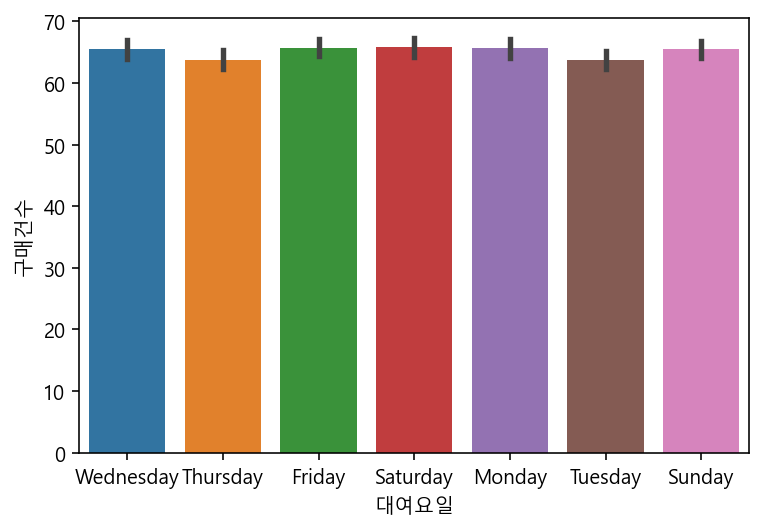

In [20]:
sns.barplot(data=df1, y='구매건수', x='대여요일') # 차이 없음

In [21]:
df1.columns

Index(['예약번호', '차종', '차량번호', '대여존', '단지구분', '단지유형', '차량연식', '등급', '아이디',
       '생년월일', '연령', '성별', '거주단지', '가입일시', '가입년월', '예약일시', '예약시작', '예약종료',
       'Year', 'Month', 'Day', 'Week', 'Date', '시작월', '시작주', '시작일', '시작시',
       '시작시분', '예약분', '예약시간 (시)', '예약상태', '사용시작', '사용종료', '종료요일', '예약대기시간 (시)',
       '이용시간 (시)', '시간요금', '이용거리', '총요금', '예약요금', '연장요금', '반납지연요금', '거리요금',
       '취소패널티', '수동결제금액', '원예약요금', '쿠폰', '쿠폰번호', '연령_10대', '총구매액', '구매건수',
       '평균구매액', '최대구매액', '주이용차량', '대여요일'],
      dtype='object')

In [22]:
# 통계(ANOVA)

model = smf.ols('구매건수 ~ C(대여요일)', data = df1).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(대여요일),6.00000,56861.66354,9476.94392,1.43967,0.19500
Residual,81237.00000,534759802.72384,6582.71234,NaN,NaN


##### 요일별 이용거리

In [23]:
df1.groupby('대여요일')['이용거리'].mean()

대여요일
Friday      30.96802
Monday      30.13934
Saturday    30.06215
Sunday      30.95235
Thursday    29.78035
Tuesday     32.15647
Wednesday   31.29831
Name: 이용거리, dtype: float64

In [24]:
# 통계(ANOVA)

model = smf.ols('이용거리 ~ C(대여요일)', data = df1).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(대여요일),6.00000,48590.37824,8098.39637,2.08339,0.05171
Residual,82786.00000,321800213.20962,3887.13325,NaN,NaN


##### 분기별

In [25]:
df1['가입년월'] = df1['가입년월'].astype('str')

In [26]:
df1["월별"] = df1["가입년월"].apply(lambda x : x.split("/")[1])

In [27]:
df1['월별'] = df1['월별'].astype('int')

In [28]:
df1['분기별'] =df1["월별"].apply(lambda x : (x+2)//3) 

<AxesSubplot:xlabel='분기별', ylabel='총구매액'>

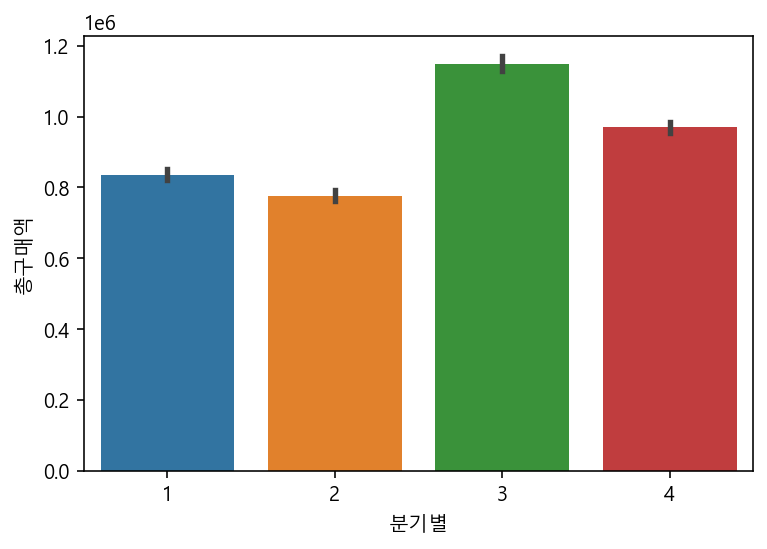

In [29]:
sns.barplot(data=df1, y='총구매액', x='분기별')

##### 월별 차량 종류 

In [30]:
df1.groupby('차종')['월별'].agg([
    ('차량주사용월', lambda x:x.value_counts().index[0])
])

,차량주사용월
차종,
K3,7
레이,4
레이BEE,4
모닝,11
아반떼MD,3


#####  예비고객

In [31]:
a = df1.groupby('아이디')['이용시간 (시)'].agg([
    ('아이디별 이용시간', sum)
]).reset_index()

In [32]:
f = f.merge(a, how='left')

In [33]:
f.loc[(f['총구매액'] ==0) & (f['아이디별 이용시간']!=0),"예비고객"] = 0  #예비고객

In [34]:
f['예비고객'] = f['예비고객'].replace(np.NaN, 1)

In [35]:
len(f[f['예비고객']==0])

26

In [36]:
# 예비고객 비율
print(len(f[f['예비고객']==0])/len(f))

0.0035733919736118747


##### 이용거리 관련 

In [37]:
a=df1.groupby('차종')['이용거리'].agg([
    ('총주행거리', np.sum),
    ('평균주행거리',np.mean)
]).reset_index()

In [38]:
b=df1.groupby('성별')['이용거리'].agg([
    ('총주행거리', np.sum),
    ('평균주행거리',np.mean)
]).reset_index()

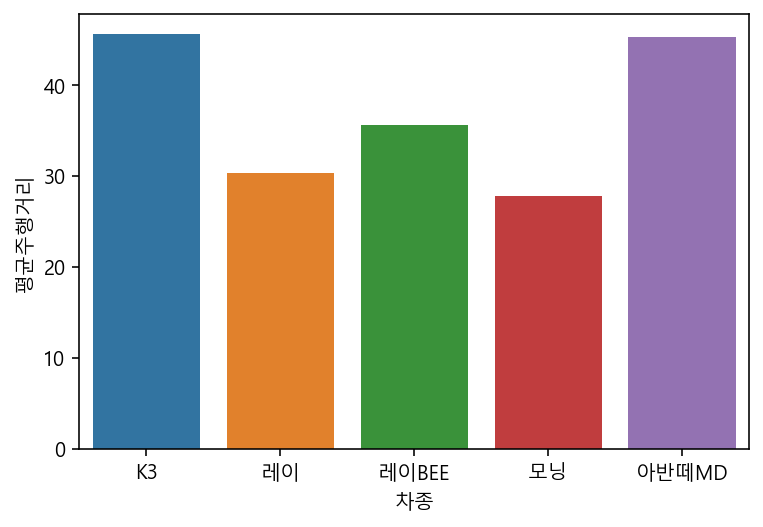

In [39]:
sns.barplot(data=a, x='차종', y='평균주행거리')
plt.show()

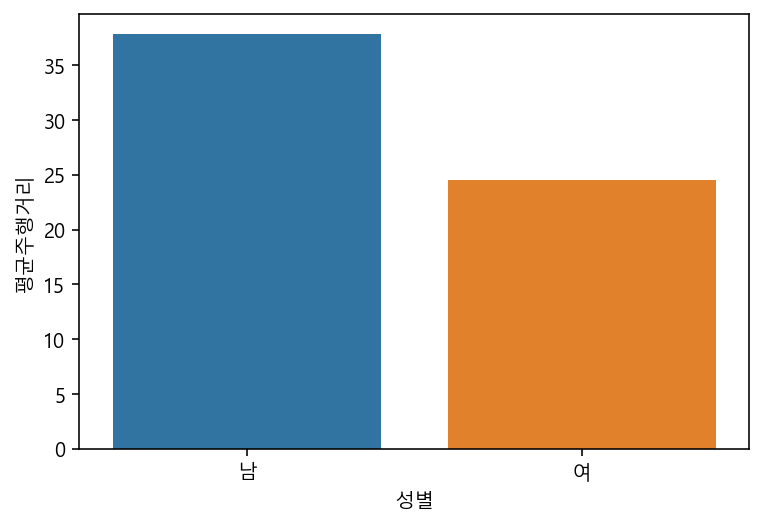

In [40]:
sns.barplot(data=b, x='성별', y='평균주행거리')
plt.show()

#### 선호차량 관련

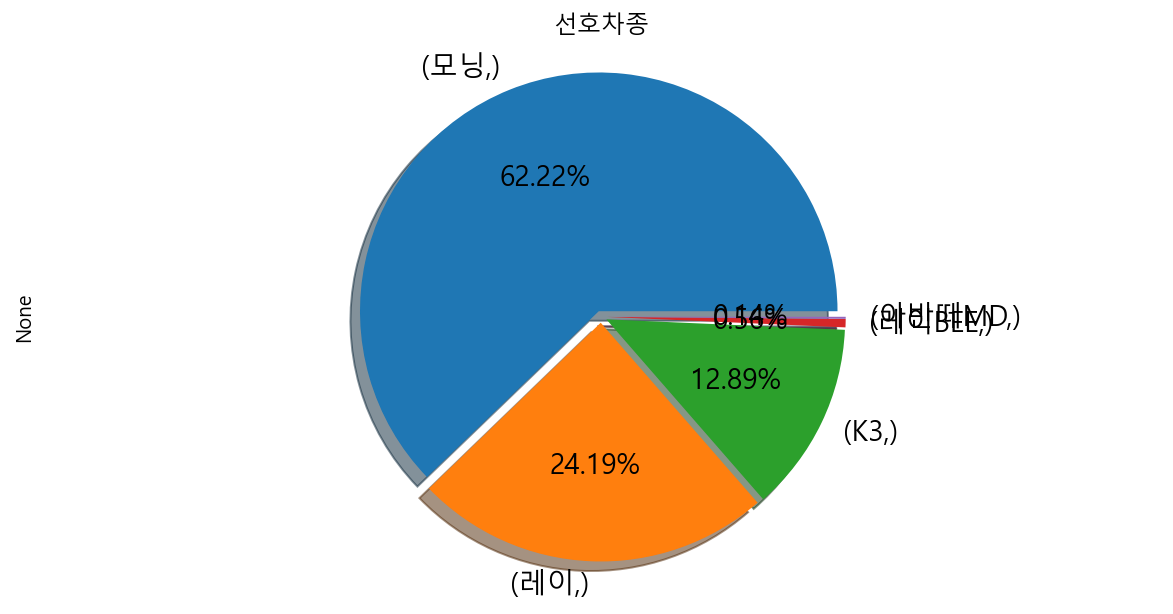

In [41]:
# 전체 선호 차량
df5 = df1[['차종']]
df3 = df5.value_counts()
df3.plot.pie(autopct='%.2f%%', figsize=(10,5), textprops={'fontsize': 14}, explode=[0.025,0.025,0.025,0.025,0.025],shadow=True)
plt.title("선호차종")

plt.axis('equal')
plt.show()

##### _성별_

In [42]:
a = df1.groupby('아이디')['차종'].agg([
    ('선호 차량', lambda x: x.value_counts().index[0])
]).reset_index()
f = f.merge(a, how='left')

In [43]:
b=[]
for i in range(5):
    a=f.groupby('성별')['선호 차량'].agg([
    ('성별 선호 차량', lambda x:x.value_counts().index[i])])
    b.append(a)
print(b)

[   성별 선호 차량
성별         
남        모닝
여        모닝,    성별 선호 차량
성별         
남        레이
여        레이,    성별 선호 차량
성별         
남        K3
여        K3,    성별 선호 차량
성별         
남     레이BEE
여     레이BEE,    성별 선호 차량
성별         
남     아반떼MD
여     아반떼MD]


In [44]:
c=[]
for i in range(5):
    a=f.groupby('성별')['선호 차량'].agg([
    ('성별_선호차량_ratio', lambda x:x.value_counts().values[i])])
    c.append(a)
print(c)

[    성별_선호차량_ratio
성별               
남            2151
여            2195,     성별_선호차량_ratio
성별               
남             985
여             953,     성별_선호차량_ratio
성별               
남             618
여             335,     성별_선호차량_ratio
성별               
남              15
여              12,     성별_선호차량_ratio
성별               
남               9
여               3]


In [45]:
차종 = ['모닝','레이','K3','레이BEE','아반떼MD']
남 = [2085,1010,652,22,9]
여 = [2135,985,359,16,3]

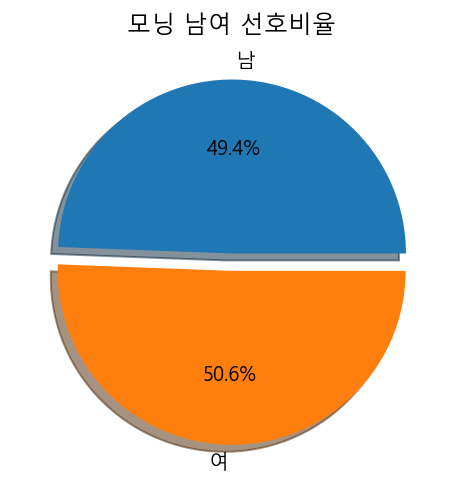

In [46]:
ratio = [남[0]/(남[0]+여[0]), 여[0]/(남[0]+여[0])]
labels = ['남','여']
%matplotlib inline 
explode = [0.05, 0.05]
plt.pie(ratio, labels=labels, autopct='%.1f%%', shadow=True, explode = explode)
plt.title('모닝 남여 선호비율')
plt.show()

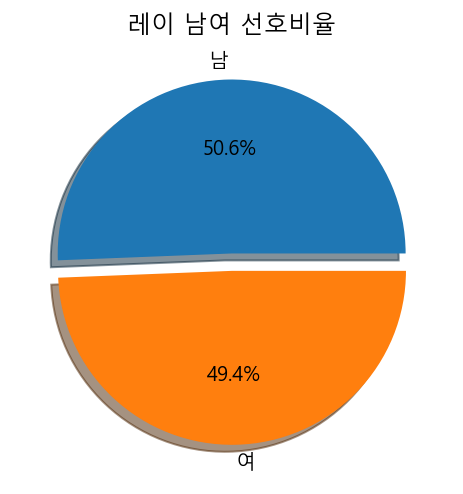

In [47]:
ratio = [남[1]/(남[1]+여[1]), 여[1]/(남[1]+여[1])]
labels = ['남','여']
%matplotlib inline 
explode = [0.05, 0.05]
plt.pie(ratio, labels=labels, autopct='%.1f%%', shadow=True, explode = explode)
plt.title('레이 남여 선호비율')
plt.show()

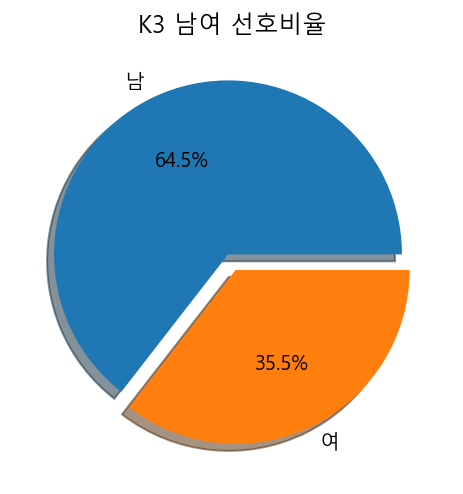

In [48]:
ratio = [남[2]/(남[2]+여[2]), 여[2]/(남[2]+여[2])]
labels = ['남','여']
%matplotlib inline 
explode = [0.05, 0.05]
plt.pie(ratio, labels=labels, autopct='%.1f%%', shadow=True, explode = explode)
plt.title('K3 남여 선호비율')
plt.show()

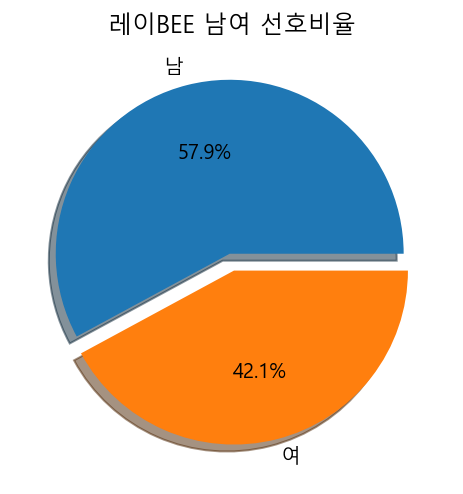

In [49]:
ratio = [남[3]/(남[3]+여[3]), 여[3]/(남[3]+여[3])]
labels = ['남','여']
%matplotlib inline 
explode = [0.05, 0.05]
plt.pie(ratio,labels=labels, autopct='%.1f%%', shadow=True, explode = explode)
plt.title('레이BEE 남여 선호비율')
plt.show()

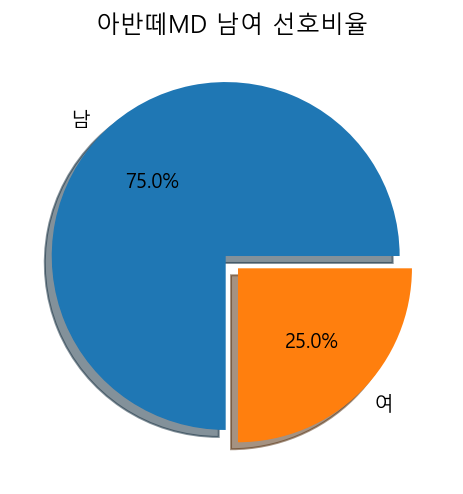

In [50]:
ratio = [남[4]/(남[4]+여[4]), 여[4]/(남[4]+여[4])]
labels = ['남','여']
%matplotlib inline 
explode = [0.05, 0.05]
plt.pie(ratio,labels=labels, autopct='%.1f%%', shadow=True, explode = explode)
plt.title('아반떼MD 남여 선호비율')
plt.show()

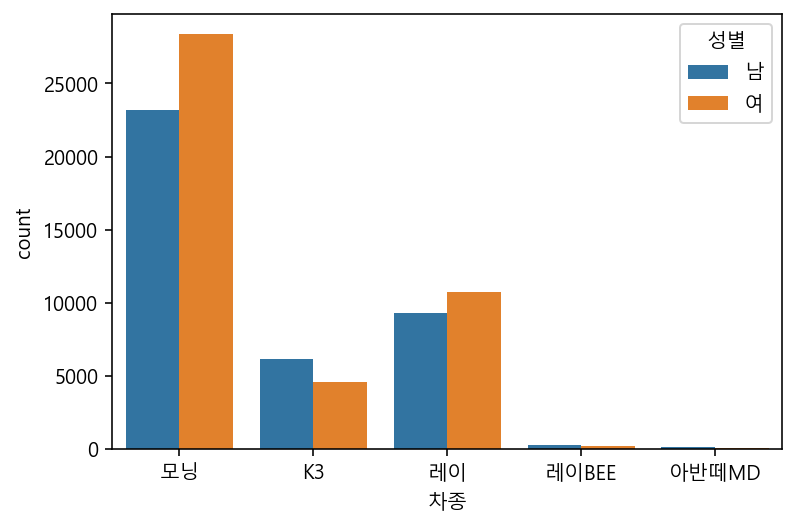

In [51]:
sns.countplot(data=df1, x='차종', hue='성별' )
plt.show()

###### 연령별

In [52]:
a=f.groupby('연령_10대')['선호 차량'].agg([
    ('성별_선호차량_ratio', lambda x:x.value_counts().index[0])])
a

,성별_선호차량_ratio
연령_10대,
20대,모닝
30대,모닝
40대,모닝
50대,모닝
60대 이상,모닝


In [53]:
a=f.groupby('연령_10대')['선호 차량'].agg([
    ('성별_선호차량_ratio', lambda x:x.value_counts().values[0])])
a

,성별_선호차량_ratio
연령_10대,
20대,957
30대,1835
40대,974
50대,439
60대 이상,141


In [54]:
f[(f['선호 차량']=='아반떼MD') & (f['연령_10대']=='20대')].count()

아이디          8
총구매액         8
구매건수         8
평균구매액        8
최대구매액        8
주이용차량        8
성별           8
연령_10대       8
아이디별 이용시간    8
예비고객         8
선호 차량        8
dtype: int64

In [55]:
#y_20_차종 = ['모닝','레이','K3','아반떼MD','레이BEE']
차종 = ['모닝','레이','K3','레이BEE','아반떼MD']
y_20 = [922,360,282,8,8]
y_30= [1783,968,368,21,4]
y_40= [948,428,205,5,0]
y_50= [432,161,107,4,0]
y_60= [135,78,49,0,0]

In [56]:
sum(y_20)

1580

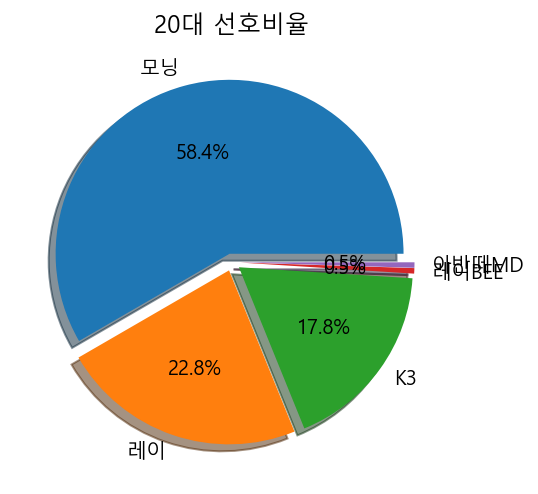

In [57]:
ratio = [y_20[0]/sum(y_20),y_20[1]/sum(y_20),y_20[2]/sum(y_20),y_20[3]/sum(y_20),y_20[4]/sum(y_20)]
labels = ['모닝','레이','K3','레이BEE','아반떼MD']
%matplotlib inline 
explode = [0.05, 0.05,0.05,0.05,0.05]
plt.pie(ratio, labels=labels, autopct='%.1f%%', shadow=True, explode = explode)
plt.title('20대 선호비율')
plt.show()

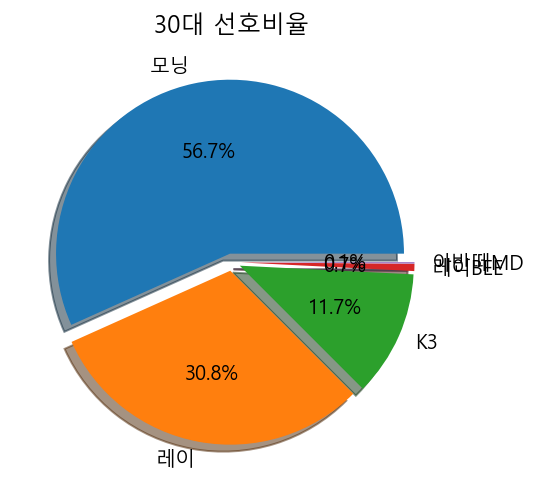

In [58]:
ratio = [y_30[0]/sum(y_30),y_30[1]/sum(y_30),y_30[2]/sum(y_30),y_30[3]/sum(y_30),y_30[4]/sum(y_30)]
labels = ['모닝','레이','K3','레이BEE','아반떼MD']
%matplotlib inline 
explode = [0.05, 0.05,0.05,0.05,0.05]
plt.pie(ratio, labels=labels, autopct='%.1f%%', shadow=True, explode = explode)
plt.title('30대 선호비율')
plt.show()

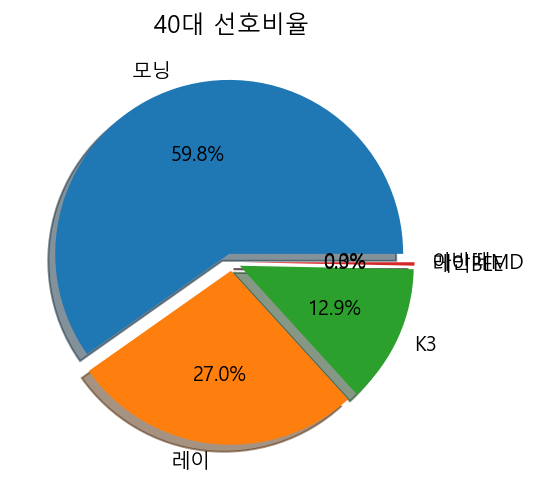

In [59]:
ratio = [y_40[0]/sum(y_40),y_40[1]/sum(y_40),y_40[2]/sum(y_40),y_40[3]/sum(y_40),y_40[4]/sum(y_40)]
labels = ['모닝','레이','K3','레이BEE','아반떼MD']
%matplotlib inline 
explode = [0.05, 0.05,0.05,0.05,0.05]
plt.pie(ratio, labels=labels, autopct='%.1f%%', shadow=True, explode = explode)
plt.title('40대 선호비율')
plt.show()

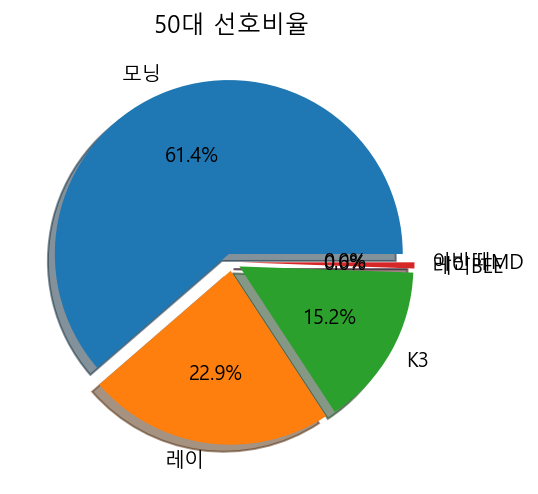

In [60]:
ratio = [y_50[0]/sum(y_50),y_50[1]/sum(y_50),y_50[2]/sum(y_50),y_50[3]/sum(y_50),y_50[4]/sum(y_50)]
labels = ['모닝','레이','K3','레이BEE','아반떼MD']
%matplotlib inline 
explode = [0.05, 0.05,0.05,0.05,0.05]
plt.pie(ratio, labels=labels, autopct='%.1f%%', shadow=True, explode = explode)
plt.title('50대 선호비율')
plt.show()

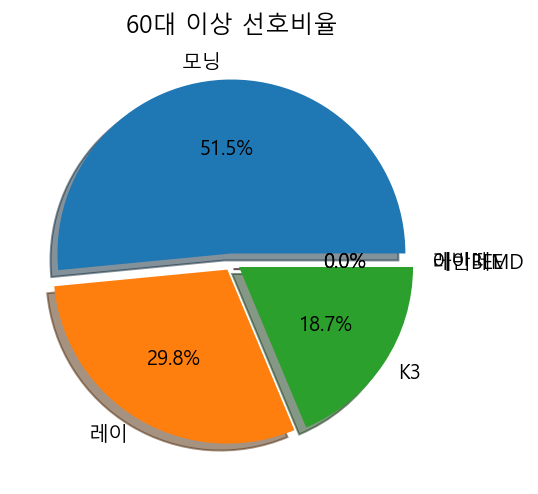

In [61]:
ratio = [y_60[0]/sum(y_60),y_60[1]/sum(y_60),y_60[2]/sum(y_60),y_60[3]/sum(y_60),y_60[4]/sum(y_60)]
labels = ['모닝','레이','K3','레이BEE','아반떼MD']
%matplotlib inline 
explode = [0.05, 0.05,0.05,0.05,0.05]
plt.pie(ratio, labels=labels, autopct='%.1f%%', shadow=True, explode = explode)
plt.title('60대 이상 선호비율')
plt.show()

## 아이디별 등급

In [62]:
a = df1.groupby('아이디')['등급'].agg([
    ('등급', lambda x:x.max())
]).reset_index()

In [63]:
f = f.merge(a, how='left')

In [64]:
f.columns

Index(['아이디', '총구매액', '구매건수', '평균구매액', '최대구매액', '주이용차량', '성별', '연령_10대',
       '아이디별 이용시간', '예비고객', '선호 차량', '등급'],
      dtype='object')

In [65]:
f.groupby('등급')['총구매액'].mean()

등급
GRDA01    251604.34783
GRDA02     98559.27649
GRDA03    296759.69006
GRDA04    650934.46927
GRDA05   1265435.49451
GRDA06   2553703.11688
Name: 총구매액, dtype: float64

## 아이디별 주 대여장소

In [66]:
a = df1.groupby('아이디')['대여존'].agg([
    ('주 대여장소', lambda x: x.value_counts().index[0])
]).reset_index()

In [67]:
f = f.merge(a, how='left')

In [68]:
len(f[f['주 대여장소'].str.contains('인천')])

859

In [69]:
f.columns

Index(['아이디', '총구매액', '구매건수', '평균구매액', '최대구매액', '주이용차량', '성별', '연령_10대',
       '아이디별 이용시간', '예비고객', '선호 차량', '등급', '주 대여장소'],
      dtype='object')

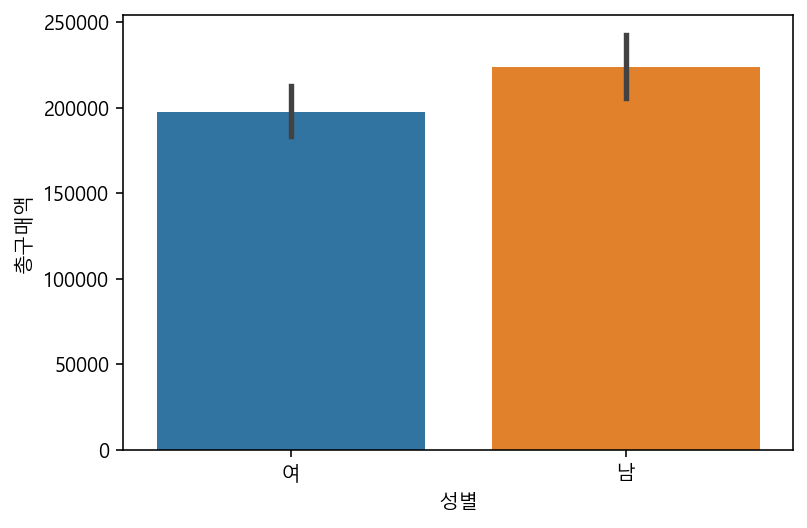

In [70]:
sns.barplot(data=f, x='성별', y='총구매액')
plt.show()

## 전체 평균 이동거리

In [71]:
df1.columns

Index(['예약번호', '차종', '차량번호', '대여존', '단지구분', '단지유형', '차량연식', '등급', '아이디',
       '생년월일', '연령', '성별', '거주단지', '가입일시', '가입년월', '예약일시', '예약시작', '예약종료',
       'Year', 'Month', 'Day', 'Week', 'Date', '시작월', '시작주', '시작일', '시작시',
       '시작시분', '예약분', '예약시간 (시)', '예약상태', '사용시작', '사용종료', '종료요일', '예약대기시간 (시)',
       '이용시간 (시)', '시간요금', '이용거리', '총요금', '예약요금', '연장요금', '반납지연요금', '거리요금',
       '취소패널티', '수동결제금액', '원예약요금', '쿠폰', '쿠폰번호', '연령_10대', '총구매액', '구매건수',
       '평균구매액', '최대구매액', '주이용차량', '대여요일', '월별', '분기별'],
      dtype='object')

In [72]:
df1['이용거리'].mean()

30.761247931588418

## 위도/경도

In [73]:
af = df1.groupby('아이디')['이용거리'].agg([
    ('평균이용거리', np.mean)
])
af.reset_index(inplace=True)

In [74]:
f = f.merge(af, how='left')

In [75]:
f

,아이디,총구매액,구매건수,평균구매액,최대구매액,주이용차량,성별,연령_10대,아이디별 이용시간,예비고객,선호 차량,등급,주 대여장소,평균이용거리
0,!!783,5470,1,5470,5470,모닝,여,30대,1.36667,1.00000,모닝,GRDA02,수원광교32,5.00000
1,!bisangchuldong,37530,1,37530,37530,모닝,남,40대,10.60000,1.00000,모닝,GRDA02,성남도촌8,44.00000
2,002476,45640,4,11410,17030,K3,여,30대,6.95000,1.00000,K3,GRDA02,파주운정한빛6,9.75000
3,00hoho,14870,3,4957,7310,모닝,여,30대,4.40000,1.00000,모닝,GRDA02,남양주별사랑2-9,13.33333
4,00kkong00,115670,5,23134,59640,레이,여,40대,26.23333,1.00000,레이,GRDA02,구리갈매1,21.40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7271,zzung79,80000,16,5000,11770,모닝,여,30대,17.93333,1.00000,모닝,GRDA02,남양주별사랑2-7,7.50000
7272,zzz6688,358750,14,25625,82220,K3,여,50대,54.45000,1.00000,K3,GRDA03,고양삼송16,65.64286
7273,zzzjy86,31880,1,31880,31880,모닝,남,30대,5.13333,1.00000,모닝,GRDA02,수원광교32,73.00000
7274,아이들아빠,360990,5,72198,177650,모닝,남,40대,81.01667,1.00000,모닝,GRDA02,서울번동3,143.20000


In [76]:
f['주 대여장소'].unique()

array(['수원광교32', '성남도촌8', '파주운정한빛6', '남양주별사랑2-9', '구리갈매1', '서울수서',
       '서울등촌9', '인천논현등대14', '광명소하6', '파주운정한울4', '남양주진접17', '부천옥길1',
       '고양삼송신원2', '구리갈매2(이스트힐)', '남양주진접16', '수원호매실5', '김포한강솔터3', '파주산내3',
       '고양원흥도래울1', '인천삼산4', '양주고읍7', '고양삼송신원4', '남양주별가람1-4', '파주운정가람6',
       '고양삼송신원3', '김포한강솔터2', '하남미사강변17', '수원호매실16', '파주운정해솔6', '인천산곡우성4',
       '서울월계1', '김포수정2', '서울서초3', '수원광교41(용인)', '고양삼송18', '김포한강호수5',
       '인천영종1', '성남판교봇들6', '남양주별빛3-5', '인천서창2-3(청아안)', '수원광교40',
       '화성동탄2기26', '파주운정가람5', '남양주별사랑2-10', '고려대 하나스퀘어', '남양주진접24',
       '서울서초4', '파주운정한울6', '수원호매실4', '화성동화2', '김포한강나비3', '서울번동5',
       '남양주별빛3', '고양삼송14', '성남백현4', '서울중계9', '화성동탄2기(행복주택)', '인천서창2-1',
       '화성동탄2기4', '양주고읍8', '수원호매실7', '평택소사벌3', '파주운정한울5', '파주육군행복마을',
       '남양주미리내4-4', '인천가정2(웨스턴블루힐)', '부천범박1', '평택소사벌이곡6', '시흥능곡9',
       '용인동백백현9', '수원호매실8', '화성동탄새강5', '화성동화3', '인천송도하버뷰13', '인천논현달맞이5',
       '수원광교센트럴타운62', '인천서창2-12', '수원광교센트럴타운60', '고양삼송16', '서울강남7(아이파크)',
       '파주운정한빛7', '인천

In [89]:
a = f['주 대여장소'].str.slice(start=0, stop=2)

In [90]:
a=pd.DataFrame(a)

In [92]:
a.columns = ['주 대여장소_2']

In [93]:
a

,주 대여장소_2
0,수원
1,성남
2,파주
3,남양
4,구리
...,...
7271,남양
7272,고양
7273,수원
7274,서울


In [94]:
a['주 대여장소_2'].unique()

array(['수원', '성남', '파주', '남양', '구리', '서울', '인천', '광명', '부천', '고양', '김포',
       '양주', '하남', '화성', '고려', '평택', '시흥', '용인', '의정', '대구', '幸福', 'H ',
       '한국'], dtype=object)

In [95]:
a[a['주 대여장소_2'].str.contains('고려')]

,주 대여장소_2
60,고려
186,고려
193,고려
199,고려
220,고려
227,고려
234,고려
264,고려
288,고려
292,고려


In [96]:
f[f['주 대여장소'].str.contains('고려')]

,아이디,총구매액,구매건수,평균구매액,최대구매액,주이용차량,성별,연령_10대,아이디별 이용시간,예비고객,선호 차량,등급,주 대여장소,평균이용거리
60,2015021259,66090,2,33045,48640,모닝,여,20대,10.45000,1.00000,모닝,GRDA02,고려대 하나스퀘어,143.50000
186,aahhhh,26420,1,26420,26420,K3,남,40대,2.41667,1.00000,K3,GRDA02,고려대 하나스퀘어,7.00000
193,abc22685,5610,1,5610,5610,모닝,남,20대,1.03333,1.00000,모닝,GRDA02,고려대 하나스퀘어,8.00000
199,abraham21,0,1,0,0,K3,남,40대,0.00000,1.00000,K3,GRDA02,고려대 중앙광장,0.00000
220,adidevil,64700,3,21567,44900,K3,남,20대,5.60000,1.00000,K3,GRDA02,고려대 하나스퀘어,38.00000
227,agc1004,20310,1,20310,20310,K3,남,30대,2.25000,1.00000,K3,GRDA02,고려대 하나스퀘어,3.00000
234,aiden1013,95490,5,19098,41100,모닝,남,20대,16.05000,1.00000,모닝,GRDA02,고려대 중앙광장,32.00000
264,aksemrl1,8020,1,8020,8020,모닝,남,20대,2.15000,1.00000,모닝,GRDA02,고려대 하나스퀘어,11.00000
288,als7047,57240,4,14310,18720,모닝,남,20대,7.88333,1.00000,모닝,GRDA02,고려대 하나스퀘어,50.50000
292,alsgusdl1123,24220,3,8073,10180,K3,남,20대,2.48333,1.00000,K3,GRDA01,고려대 중앙광장,6.00000


In [97]:
f = pd.concat([f,a], axis=1)

In [98]:
f

,아이디,총구매액,구매건수,평균구매액,최대구매액,주이용차량,성별,연령_10대,아이디별 이용시간,예비고객,선호 차량,등급,주 대여장소,평균이용거리,주 대여장소_2
0,!!783,5470,1,5470,5470,모닝,여,30대,1.36667,1.00000,모닝,GRDA02,수원광교32,5.00000,수원
1,!bisangchuldong,37530,1,37530,37530,모닝,남,40대,10.60000,1.00000,모닝,GRDA02,성남도촌8,44.00000,성남
2,002476,45640,4,11410,17030,K3,여,30대,6.95000,1.00000,K3,GRDA02,파주운정한빛6,9.75000,파주
3,00hoho,14870,3,4957,7310,모닝,여,30대,4.40000,1.00000,모닝,GRDA02,남양주별사랑2-9,13.33333,남양
4,00kkong00,115670,5,23134,59640,레이,여,40대,26.23333,1.00000,레이,GRDA02,구리갈매1,21.40000,구리
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7271,zzung79,80000,16,5000,11770,모닝,여,30대,17.93333,1.00000,모닝,GRDA02,남양주별사랑2-7,7.50000,남양
7272,zzz6688,358750,14,25625,82220,K3,여,50대,54.45000,1.00000,K3,GRDA03,고양삼송16,65.64286,고양
7273,zzzjy86,31880,1,31880,31880,모닝,남,30대,5.13333,1.00000,모닝,GRDA02,수원광교32,73.00000,수원
7274,아이들아빠,360990,5,72198,177650,모닝,남,40대,81.01667,1.00000,모닝,GRDA02,서울번동3,143.20000,서울


In [121]:
k = ['수원', '성남', '파주', '남양', '구리', '광명', '부천', '고양', '김포','양주', '하남', '화성', '평택', '시흥', '용인', '의정']
s = ['幸福','H ','한국','고려']

In [114]:
f['주 대여장소_2'].replace(['수원', '성남', '파주', '남양', '구리', '광명', '부천', '고양', '김포','양주', '하남', '화성', '평택', '시흥', '용인', '의정'], '경기', inplace=True)

In [122]:
f['주 대여장소_2'].replace(['幸福','H ','한국','고려'], '서울', inplace=True)

In [116]:
f

,아이디,총구매액,구매건수,평균구매액,최대구매액,주이용차량,성별,연령_10대,아이디별 이용시간,예비고객,선호 차량,등급,주 대여장소,평균이용거리,주 대여장소_2,주대여장소_지역
0,!!783,5470,1,5470,5470,모닝,여,30대,1.36667,1.00000,모닝,GRDA02,수원광교32,5.00000,경기,수원
1,!bisangchuldong,37530,1,37530,37530,모닝,남,40대,10.60000,1.00000,모닝,GRDA02,성남도촌8,44.00000,경기,성남
2,002476,45640,4,11410,17030,K3,여,30대,6.95000,1.00000,K3,GRDA02,파주운정한빛6,9.75000,경기,파주
3,00hoho,14870,3,4957,7310,모닝,여,30대,4.40000,1.00000,모닝,GRDA02,남양주별사랑2-9,13.33333,경기,남양
4,00kkong00,115670,5,23134,59640,레이,여,40대,26.23333,1.00000,레이,GRDA02,구리갈매1,21.40000,경기,구리
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7271,zzung79,80000,16,5000,11770,모닝,여,30대,17.93333,1.00000,모닝,GRDA02,남양주별사랑2-7,7.50000,경기,남양
7272,zzz6688,358750,14,25625,82220,K3,여,50대,54.45000,1.00000,K3,GRDA03,고양삼송16,65.64286,경기,고양
7273,zzzjy86,31880,1,31880,31880,모닝,남,30대,5.13333,1.00000,모닝,GRDA02,수원광교32,73.00000,경기,수원
7274,아이들아빠,360990,5,72198,177650,모닝,남,40대,81.01667,1.00000,모닝,GRDA02,서울번동3,143.20000,서울,서울


In [123]:
f.groupby('주 대여장소_2')['평균이용거리'].mean()

주 대여장소_2
경기   40.64883
대구   38.59623
서울   40.93218
인천   42.90814
Name: 평균이용거리, dtype: float64

In [124]:
f.columns

Index(['아이디', '총구매액', '구매건수', '평균구매액', '최대구매액', '주이용차량', '성별', '연령_10대',
       '아이디별 이용시간', '예비고객', '선호 차량', '등급', '주 대여장소', '평균이용거리', '주 대여장소_2',
       '주대여장소_지역'],
      dtype='object')

In [128]:
f

,아이디,총구매액,구매건수,평균구매액,최대구매액,주이용차량,성별,연령_10대,아이디별 이용시간,예비고객,선호 차량,등급,주 대여장소,평균이용거리,주 대여장소_2,주대여장소_지역
0,!!783,5470,1,5470,5470,모닝,여,30대,1.36667,1.00000,모닝,GRDA02,수원광교32,5.00000,경기,수원
1,!bisangchuldong,37530,1,37530,37530,모닝,남,40대,10.60000,1.00000,모닝,GRDA02,성남도촌8,44.00000,경기,성남
2,002476,45640,4,11410,17030,K3,여,30대,6.95000,1.00000,K3,GRDA02,파주운정한빛6,9.75000,경기,파주
3,00hoho,14870,3,4957,7310,모닝,여,30대,4.40000,1.00000,모닝,GRDA02,남양주별사랑2-9,13.33333,경기,남양
4,00kkong00,115670,5,23134,59640,레이,여,40대,26.23333,1.00000,레이,GRDA02,구리갈매1,21.40000,경기,구리
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7271,zzung79,80000,16,5000,11770,모닝,여,30대,17.93333,1.00000,모닝,GRDA02,남양주별사랑2-7,7.50000,경기,남양
7272,zzz6688,358750,14,25625,82220,K3,여,50대,54.45000,1.00000,K3,GRDA03,고양삼송16,65.64286,경기,고양
7273,zzzjy86,31880,1,31880,31880,모닝,남,30대,5.13333,1.00000,모닝,GRDA02,수원광교32,73.00000,경기,수원
7274,아이들아빠,360990,5,72198,177650,모닝,남,40대,81.01667,1.00000,모닝,GRDA02,서울번동3,143.20000,서울,서울


In [139]:
f[f['평균이용거리'] == 0].shape

(427, 16)

In [138]:
df1[df1['이용거리'] ==0].shape

(15671, 57)

In [157]:
df1['예약시작'] =  df1['예약시작'].astype('str')

In [166]:
a

0        2017-01-01
1        2017-01-01
2        2017-01-01
3        2017-01-01
4        2017-01-01
            ...    
82788    2018-01-20
82789    2018-01-26
82790    2018-01-26
82791    2018-01-27
82792    2018-01-30
Name: 예약시작, Length: 82793, dtype: object

In [173]:
df1['예약일'] =  df1['예약시작'].apply(
    lambda x:x.split(' ')[0])

In [178]:
len(df1)

82793

In [179]:
len(df1[(df1['예약일'] == '2017-01-01') | (df1['예약일'] == '2017-01-27') | (df1['예약일'] == '2017-01-28') | (df1['예약일'] == '2017-01-29') |
    (df1['예약일'] == '2017-01-30') | (df1['예약일'] == '2017-05-03') | (df1['예약일'] == '2017-05-05') | (df1['예약일'] == '2017-05-09')|
    (df1['예약일'] == '2017-06-06') | (df1['예약일'] == '2017-08-15') | (df1['예약일'] == '2017-10-02') |
    (df1['예약일'] == '2017-10-03') | (df1['예약일'] == '2017-10-04') | (df1['예약일'] == '2017-10-05') | 
    (df1['예약일'] == '2017-10-06') | (df1['예약일'] == '2017-10-09') | (df1['예약일'] == '2017-12-25')])
  
  
#'2017-01-27','2017-01-28','2017-01-29','2017-01-30','2017-03-01',
#                                       '2017-05-03','2017-05-05','2017-05-09','2017-06-06','2017-08-15',
#                                       '2017-10-02','2017-10-03','2017-10-04','2017-10-05','2017-10-06','2017-10-09',
#                                       '2017-12-25')

3481

In [183]:
print((82793 / 365) * 17)

3856.1123287671235


In [189]:
len(f[f['구매건수']<3])

2997

In [187]:
len(f)

7276

In [190]:
print(2997/7276)

0.41190214403518416


In [192]:
f.groupby('등급')['평균구매액'].mean()

등급
GRDA01   102568.65217
GRDA02    20596.08843
GRDA03    26339.09845
GRDA04    29304.26816
GRDA05    28763.32418
GRDA06    34114.51948
Name: 평균구매액, dtype: float64

In [197]:
f.등급

0       GRDA02
1       GRDA02
2       GRDA02
3       GRDA02
4       GRDA02
         ...  
7271    GRDA02
7272    GRDA03
7273    GRDA02
7274    GRDA02
7275    GRDA03
Name: 등급, Length: 7276, dtype: object

In [201]:
a = f[f['등급']=='GRDA01']

In [207]:
a['최대구매액'].max()

502820